In [9]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from mpl_toolkits.mplot3d import Axes3D

In [10]:
base_ds2 = pd.read_csv(r"C:\Users\ullma\Documents\TCC\tcc-gabriel\data\olist-processed\olist_processed.csv", sep=",")
base_ds2

,clientId,country,product_id
0,50398,RJ,8361
1,87747,SP,28636
2,21004,MG,24819
3,65566,SP,14831
4,37639,SP,21360
...,...,...,...
112645,4740,MA,9410
112646,5124,PR,6416
112647,76686,SP,14373
112648,87875,SP,19435


In [11]:
len(base_ds2['product_id'])

112650

In [12]:
vc = base_ds2['product_id'].value_counts()
products = vc.keys()
amounts = vc.values
lp = len(products)
print("Unique prods: " + str(lp))
product_amount = {}

i = 0
threshold = 400
g_threshold = 0
for product in products:
    product_amount[product] = amounts[i]
    if amounts[i] > threshold:
        g_threshold += 1
    i += 1
print("Greater than " + str(threshold) + ": " + str(g_threshold))
perc = ((lp - g_threshold)/lp) * 100
print("Lesser than " + str(threshold) + ": " + str(perc) + "%")
product_amount

Unique prods: 31881
Greater than 400: 3
Lesser than 400: 99.990590006587%


{21392: 525,
 8346: 496,
 19099: 489,
 7139: 387,
 6862: 385,
 10487: 367,
 26156: 346,
 10514: 322,
 2701: 282,
 7806: 274,
 5522: 260,
 20617: 231,
 15572: 229,
 23296: 198,
 11360: 197,
 28021: 191,
 28553: 186,
 8414: 181,
 22480: 170,
 6764: 170,
 20972: 161,
 13614: 157,
 3304: 157,
 30139: 155,
 8512: 155,
 8048: 150,
 8837: 148,
 24471: 146,
 15322: 144,
 25955: 144,
 17475: 143,
 12674: 141,
 28018: 140,
 860: 140,
 4148: 136,
 1326: 136,
 21933: 131,
 29413: 128,
 26242: 124,
 6913: 124,
 9567: 123,
 12038: 120,
 17102: 119,
 24728: 119,
 10398: 118,
 13903: 116,
 10668: 114,
 16625: 113,
 1032: 112,
 2862: 110,
 1464: 106,
 15671: 106,
 11217: 106,
 10047: 104,
 1277: 104,
 16975: 101,
 15175: 101,
 19779: 99,
 5275: 99,
 13532: 99,
 26639: 97,
 14982: 96,
 29328: 95,
 12183: 94,
 8489: 93,
 28842: 93,
 24646: 92,
 14792: 92,
 17456: 92,
 25572: 92,
 29643: 91,
 7975: 90,
 22571: 90,
 29675: 89,
 8978: 88,
 20483: 88,
 4300: 87,
 15980: 87,
 8408: 87,
 25260: 85,
 10038: 84,

In [13]:
#base_ds3 = pd.read_csv(r"C:\Users\Gabriel Ullmann\Desktop\all_tcc_results\olist\best-seller\olist_g_amounts.csv", sep=",")
#base_ds3[(base_ds3.product_id == 8346)]['rating'].mean()

<AxesSubplot:title={'center':'São Paulo'}, xlabel='Frequência de pedidos', ylabel='Contagem'>

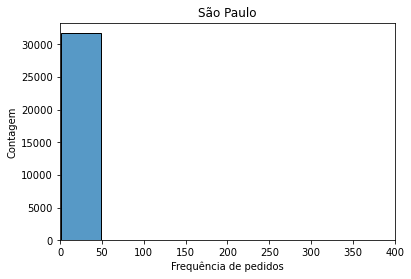

In [14]:
plt.xlim(0, threshold)
plt.title('São Paulo')
#plt.yscale("log")
plt.xlabel('Frequência de pedidos')
plt.ylabel('Contagem')
sns.histplot(amounts, stat="count", bins=11, kde=False)

In [15]:
rated_ds = pd.read_csv(r"C:\Users\ullma\Desktop\all_tcc_results\olist\gen-cf\g_cbr.csv", sep=",")
all_rated_items = rated_ds.values

In [16]:
with_amount = []
for item in all_rated_items:
    for product in vc:
        try:
            amount = product_amount[item[1]]
            if amount:
                with_amount.append(np.append(item, amount))
                break
        except KeyError:
            print("opa");
            continue;
with_amount

[array([   0, 6940,    1,   31], dtype=int64),
 array([    1, 10124,     1,     7], dtype=int64),
 array([    2, 12581,     1,     5], dtype=int64),
 array([   3, 4543,    1,    3], dtype=int64),
 array([    4, 24781,     1,     1], dtype=int64),
 array([   5, 4859,    1,    3], dtype=int64),
 array([    6, 17548,     1,     8], dtype=int64),
 array([    7, 12331,     1,     5], dtype=int64),
 array([    8, 28188,     1,    17], dtype=int64),
 array([    9, 10024,     1,    13], dtype=int64),
 array([   10, 15630,     1,    12], dtype=int64),
 array([   11, 18177,     1,     1], dtype=int64),
 array([   12, 30752,     1,    23], dtype=int64),
 array([  13, 2912,    1,    7], dtype=int64),
 array([  14, 8869,    1,    5], dtype=int64),
 array([   15, 23260,     1,     5], dtype=int64),
 array([   16, 29966,     1,     8], dtype=int64),
 array([   17, 10431,     1,     3], dtype=int64),
 array([   18, 21703,     1,    22], dtype=int64),
 array([   19, 22735,     1,     7], dtype=int64),


In [17]:
new_npd = pd.DataFrame(with_amount, columns=['client_id', 'product_id', 'rating', 'amount'])

In [18]:
new_npd[(new_npd.product_id == 21392 )]

,client_id,product_id,rating,amount
338,333,21392,2,525
893,873,21392,2,525
994,972,21392,2,525
1256,1226,21392,2,525
1696,1654,21392,2,525
...,...,...,...,...
1049233,95415,21392,4,525
1049243,95416,21392,4,525
1049253,95417,21392,4,525
1049263,95418,21392,4,525


In [30]:
new_npd.to_csv('opa.csv', index=False)

In [19]:
new_npd.corr()

,client_id,product_id,rating,amount
client_id,1.000000,0.000394,0.000024,0.000114
product_id,0.000394,1.000000,-0.237263,-0.230326
rating,0.000024,-0.237263,1.000000,0.741542
amount,0.000114,-0.230326,0.741542,1.000000


In [20]:
new_npd['rating'].value_counts()

4    951028
3    381680
1     95079
2      3172
Name: rating, dtype: int64

In [27]:
new_npd[(rated_ds.rating == 4)]['amount'].value_counts()

274    95167
282    95154
367    95151
385    95145
387    95130
322    95121
346    95103
496    95083
525    94992
489    94982
Name: amount, dtype: int64